# Creación dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the dataset
data = load_breast_cancer()

# Convert the dataset to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

# Split the dataset into train, validation, and test sets
train_df, remaining_df = train_test_split(df, test_size=0.35, random_state=42)
val_df, test_df = train_test_split(remaining_df, test_size=0.428571, random_state=42)  # 0.428571 x 0.35 = 0.15

# Save the DataFrames to CSV files
train_df.to_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_train.csv', index=False)
val_df.to_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_validation.csv', index=False)
test_df.to_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_test.csv', index=False)

### (b) i. Implementar LDA y reportar la matriz de confusion, accuracy, precision, recall, curva ROC y área bajo la curva ROC, sobre el conjunto de validación.

Confusion Matrix:
[[36  4]
 [ 2 72]]
Accuracy: 0.9473684210526315
Precision: 0.9473684210526315
Recall: 0.972972972972973
AUC: 0.9905405405405405


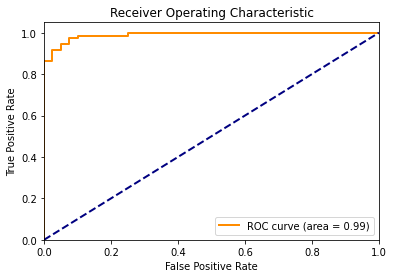

In [3]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt


train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_train.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_validation.csv')

# Separate features and target variable
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_val = val_df.drop('target', axis=1)
y_val = val_df['target']

# Initialize and train the LDA model using sklearn
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = lda.predict(X_val)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Calculate ROC curve and AUC
y_scores = lda.decision_function(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### (c) i. Para LDA, reportar la matriz de confusión, accuracy, precision, recall, curva ROC y área bajo la curva ROC (AUC-ROC), evaluados tanto sobre el test set, como también mediante validación cruzada con 5 folds (en este caso, se deben juntar los conjuntos de entrenamiento y validación, y hacer validación cruzada sobre estos). Comparar estos resultados con las métricas reportadas en el inciso anterior y analizar cualquier diferencia que se observe

Test Set Metrics:
Confusion Matrix:
[[28  3]
 [ 1 54]]
Accuracy: 0.9534883720930233
Precision: 0.9473684210526315
Recall: 0.9818181818181818
AUC (ROC) Test Set: 0.9976539589442814

Cross-Validation Metrics:
Mean Cross-Validation Accuracy: 0.9607173539518901
Mean Cross-Validation AUC (ROC): 0.9856390179649481


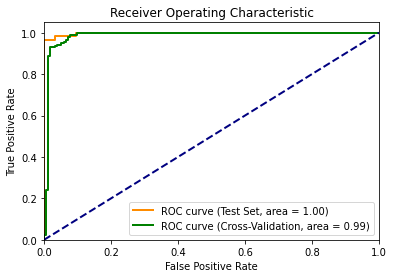

In [4]:
from sklearn.model_selection import cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_train.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_validation.csv')
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_test.csv')

# Combine training and validation sets for cross-validation
combined_df = pd.concat([train_df, val_df], axis=0)

# Separate features and target variable
X_combined = combined_df.drop('target', axis=1)
y_combined = combined_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Initialize and train the LDA model on the combined set
lda = LinearDiscriminantAnalysis()
lda.fit(X_combined, y_combined)

# Make predictions on the test set
y_pred_test = lda.predict(X_test)

# Calculate evaluation metrics for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

# Calculate ROC curve and AUC for the test set
y_scores_test = lda.decision_function(X_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Perform 5-fold cross-validation on the combined set
cv_scores = cross_val_score(lda, X_combined, y_combined, cv=5)
y_pred_cv = cross_val_predict(lda, X_combined, y_combined, cv=5, method='decision_function')
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_combined, y_pred_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Print evaluation metrics for the test set
print("Test Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("AUC (ROC) Test Set:", roc_auc_test)

# Print evaluation metrics for cross-validation
print("\nCross-Validation Metrics:")
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Mean Cross-Validation AUC (ROC):", roc_auc_cv)

# Plot ROC curve for the test set and cross-validation
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test Set, area = %0.2f)' % roc_auc_test)
plt.plot(fpr_cv, tpr_cv, color='green', lw=2, label='ROC curve (Cross-Validation, area = %0.2f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### (b) ii. Implementar KNN (donde el hiperparámetro k es ajustado usando el AUC-ROC sobre el conjunto de validación) y reportar la matriz de confusion, accuracy, precision, recall, curva ROC y área bajo la curva ROC, sobre el conjunto de validación.

Best k: 15
Confusion Matrix:
[[39  1]
 [ 2 72]]
Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
AUC (ROC): 0.9971283783783784


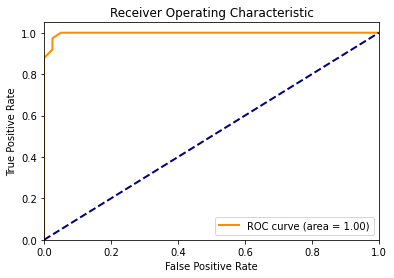

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Load the datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_train.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_validation.csv')

# Separate features and target variable
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_val = val_df.drop('target', axis=1)
y_val = val_df['target']

# Hyperparameters to tune (k values)
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Initialize variables to store best model and its performance
best_auc = 0
best_k = None
best_model = None

# Iterate over different values of k
for k in k_values:
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred_proba = knn.predict_proba(X_val)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Update best model if current model has higher AUC
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_k = k
        best_model = knn

print("Best k:", k)
# Make predictions on the validation set using the best model
y_pred = best_model.predict(X_val)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Calculate ROC curve and AUC using the best model
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC (ROC):", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### (c) ii. Para KNN, reportar la matriz de confusión, accuracy, precision, recall, curva ROC y área bajo la curva ROC (AUC-ROC), evaluados tanto sobre el test set, como también mediante validación cruzada con 5 folds (en este caso, se deben juntar los conjuntos de entrenamiento y validación, y hacer validación cruzada sobre estos). Comparar estos resultados con las métricas reportadas en el inciso anterior y analizar cualquier diferencia que se observe

Test Set Metrics:
Confusion Matrix:
[[29  2]
 [ 0 55]]
Accuracy: 0.9767441860465116
Precision: 0.9649122807017544
Recall: 1.0
AUC (ROC) Test Set: 1.0

Cross-Validation Metrics:
Mean Cross-Validation Accuracy: 0.923475085910653
Mean Cross-Validation AUC (ROC): 0.96765577549303


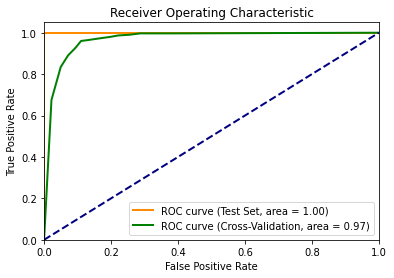

In [11]:
# Load the datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_train.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_validation.csv')
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_test.csv')

# Combine training and validation sets for cross-validation
combined_df = pd.concat([train_df, val_df], axis=0)

# Separate features and target variable
X_combined = combined_df.drop('target', axis=1)
y_combined = combined_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Train KNN model on the combined set
knn = KNeighborsClassifier(n_neighbors=best_k)  # Using the best k value found in previous step
knn.fit(X_combined, y_combined)

# Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Calculate evaluation metrics for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

# Calculate ROC curve and AUC for the test set
y_scores_test = knn.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Perform 5-fold cross-validation on the combined set
cv_scores = cross_val_score(knn, X_combined, y_combined, cv=5)
y_pred_cv = cross_val_predict(knn, X_combined, y_combined, cv=5, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_combined, y_pred_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Print evaluation metrics for the test set
print("Test Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("AUC (ROC) Test Set:", roc_auc_test)

# Print evaluation metrics for cross-validation
print("\nCross-Validation Metrics:")
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Mean Cross-Validation AUC (ROC):", roc_auc_cv)

# Plot ROC curve for the test set and cross-validation
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test Set, area = %0.2f)' % roc_auc_test)
plt.plot(fpr_cv, tpr_cv, color='green', lw=2, label='ROC curve (Cross-Validation, area = %0.2f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### (b) iii. Implementar regresión logistica con regularización l2 (donde el hiperparametro lambda es ajustado evaluando el AUC-ROC sobre el conjunto de validación) y reportar la matriz de confusion, accuracy, precision, recall, curva ROC y área bajo la curva ROC, sobre el conjunto de validación.

Best lambda: 10
Confusion Matrix:
[[37  3]
 [ 1 73]]
Accuracy: 0.9649122807017544
Precision: 0.9605263157894737
Recall: 0.9864864864864865
AUC (ROC): 0.9972972972972973


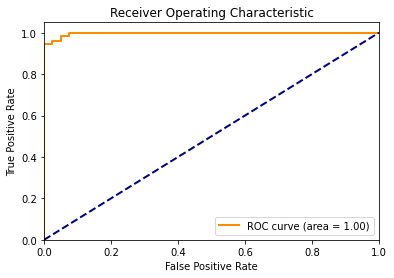

In [13]:
from sklearn.linear_model import LogisticRegression

# Load the datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_train.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_validation.csv')

# Separate features and target variable
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_val = val_df.drop('target', axis=1)
y_val = val_df['target']

# Hyperparameters to tune (lambda values)
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize variables to store best model and its performance
best_auc = 0
best_lambda = None
best_model = None

# Iterate over different values of lambda
for lambda_val in lambda_values:
    # Train logistic regression model with L2 regularization
    lr = LogisticRegression(penalty='l2', C=1/lambda_val, solver='liblinear')
    lr.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred_proba = lr.predict_proba(X_val)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Update best model if current model has higher AUC
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_lambda = lambda_val
        best_model = lr

print("Best lambda:", best_lambda)
# Make predictions on the validation set using the best model
y_pred = best_model.predict(X_val)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Calculate ROC curve and AUC using the best model
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC (ROC):", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### (c) iii. Para la regresión logística con regularización l2, reportar la matriz de confusión, accuracy, precision, recall, curva ROC y área bajo la curva ROC (AUC-ROC), evaluados tanto sobre el test set, como también mediante validación cruzada con 5 folds (en este caso, se deben juntar los conjuntos de entrenamiento y validación, y hacer validación cruzada sobre estos). Comparar estos resultados con las métricas reportadas en el inciso anterior y analizar cualquier diferencia que se observe.

Test Set Metrics:
Confusion Matrix:
[[29  2]
 [ 1 54]]
Accuracy: 0.9651162790697675
Precision: 0.9642857142857143
Recall: 0.9818181818181818
AUC (ROC) Test Set: 0.9976539589442815

Cross-Validation Metrics:
Mean Cross-Validation Accuracy: 0.9440936426116838
Mean Cross-Validation AUC (ROC): 0.9873769712048589


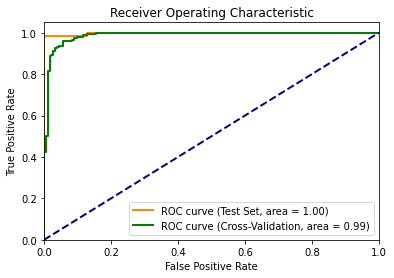

In [14]:
# Load the datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_train.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_validation.csv')
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/Clase 3/i302/TP3/Data/1 - Breast Cancer Diagnosis/breast_cancer_test.csv')

# Combine training and validation sets for cross-validation
combined_df = pd.concat([train_df, val_df], axis=0)

# Separate features and target variable
X_combined = combined_df.drop('target', axis=1)
y_combined = combined_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Train logistic regression model with L2 regularization on the combined set
lr = LogisticRegression(penalty='l2', solver='liblinear')
lr.fit(X_combined, y_combined)

# Make predictions on the test set
y_pred_test = lr.predict(X_test)

# Calculate evaluation metrics for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

# Calculate ROC curve and AUC for the test set
y_scores_test = lr.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Perform 5-fold cross-validation on the combined set
cv_scores = cross_val_score(lr, X_combined, y_combined, cv=5)
y_pred_cv = cross_val_predict(lr, X_combined, y_combined, cv=5, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, _ = roc_curve(y_combined, y_pred_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Print evaluation metrics for the test set
print("Test Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("AUC (ROC) Test Set:", roc_auc_test)

# Print evaluation metrics for cross-validation
print("\nCross-Validation Metrics:")
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Mean Cross-Validation AUC (ROC):", roc_auc_cv)

# Plot ROC curve for the test set and cross-validation
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test Set, area = %0.2f)' % roc_auc_test)
plt.plot(fpr_cv, tpr_cv, color='green', lw=2, label='ROC curve (Cross-Validation, area = %0.2f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()